In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import numpy as np
from glob import glob
from sklearn.decomposition import PCA

target = ['YL_M1_B1_W1','YR_M1_B1_W1','YL_M1_B1_W2','YR_M1_B1_W2']
data_path = glob('./data/*.csv')
data_path = [ './data\\data_c100.csv',
 './data\\data_c30.csv',
 './data\\data_c40.csv',
 './data\\data_c50.csv',
 './data\\data_c70.csv',
            './data\\data_s100.csv',
 './data\\data_s30.csv',
 './data\\data_s40.csv',
 './data\\data_s50.csv',
 './data\\data_s70.csv']

data_path

# kfold

['./data\\data_c100.csv',
 './data\\data_c30.csv',
 './data\\data_c40.csv',
 './data\\data_c50.csv',
 './data\\data_c70.csv',
 './data\\data_s100.csv',
 './data\\data_s30.csv',
 './data\\data_s40.csv',
 './data\\data_s50.csv',
 './data\\data_s70.csv']

In [3]:
pd.read_csv('./data/data_columns.csv')

name                description
0              Distance                      거리[m]
1           A_M1_C_B1_Y        대차상부 차체 횡가속도[m/s^2]
2           A_M1_C_B1_Z       대차상부 차체 수직가속도[m/s^2]
3        A_M1_B1_W1_Y_L   좌측 전위 대차 프레임 횡가속도[m/s^2]
4        A_M1_B1_BC_Y_L   좌측 중앙 대차 프레임 횡가속도[m/s^2]
5        A_M1_B1_W2_Y_L   좌측 후위 대차 프레임 횡가속도[m/s^2]
6        A_M1_B1_W1_Y_R   우측 전위 대차 프레임 횡가속도[m/s^2]
7        A_M1_B1_BC_Y_R   우측 중앙 대차 프레임 횡가속도[m/s^2]
8        A_M1_B1_W2_Y_R   우측 후위 대차 프레임 횡가속도[m/s^2]
9        A_M1_B1_W1_Z_L  좌측 전위 대차 프레임 수직가속도[m/s^2]
10       A_M1_B1_BC_Z_L  좌측 중앙 대차 프레임 수직가속도[m/s^2]
11       A_M1_B1_W2_Z_L  좌측 후위 대차 프레임 수직가속도[m/s^2]
12       A_M1_B1_W1_Z_R  우측 전위 대차 프레임 수직가속도[m/s^2]
13       A_M1_B1_BC_Z_R  우측 중앙 대차 프레임 수직가속도[m/s^2]
14       A_M1_B1_W2_Z_R  우측 후위 대차 프레임 수직가속도[m/s^2]
15  A__B1_W1_Y_A_axle_L     좌측 전위 액슬박스 횡가속도[m/s^2]
16  A__B1_W2_Y_A_axle_L     좌측 후위 액슬박스 횡가속도[m/s^2]
17  A__B1_W1_Y_A_axle_R     우측 전위 액슬박스 횡가속도[m/s^2]
18  A__B1_W2_Y_A_axle_R     우측 후위 액슬박스 횡가속도[m/s^2]
19  A__B1_W1_Z_A_axle_L    좌측 전위 액슬박스 수직가속도[m/s^2]
20  A__B1_W2_Z_A_axle_L    좌측 후위 액슬박스 수직가속도[m/s^2]
21  A__B1_W1_Z_A_axle_R    우측 전위 액슬박스 수직가속도[m/s^2]
22  A__B1_W2_Z_A_axle_R    우측 후위 액슬박스 수직가속도[m/s^2]
23         V_M1_B1_W1_L          좌측 전위 차륜 수직하중[kN]
24         V_M1_B1_W1_R          우측 전위 차륜 수직하중[kN]
25          QL_M1_B1_W1             좌측 전위 차륜 윤중감소율
26          QR_M1_B1_W1             우측 전위 차륜 윤중감소율
27         V_M1_B1_W2_L          좌측 후위 차륜 수직하중[kN]
28         V_M1_B1_W2_R          우측 후위 차륜 수직하중[kN]
29          QL_M1_B1_W2             좌측 후위 차륜 윤중감소율
30          QR_M1_B1_W2             우측 후위 차륜 윤중감소율
31          YL_M1_B1_W1              좌측 전위 차륜 탈선계수
32          YR_M1_B1_W1              우측 전위 차륜 탈선계수
33          YL_M1_B1_W2              좌측 후위 차륜 탈선계수
34          YR_M1_B1_W2              우측 후위 차륜 탈선계수

In [4]:
data_path = [
 './data\\data_c30.csv',
 './data\\data_c40.csv',
 './data\\data_c50.csv',
 './data\\data_c70.csv',
 './data\\data_c100.csv']
data_c = [pd.merge(pd.read_csv('./data\\lane_data_c.csv',),pd.read_csv(i)) for i in data_path]
data_c = [pd.read_csv(i) for i in data_path]

# tar = data_c[0]
# for i in tar.columns:
#     plt.title(i)
#     tar[i].plot()
#     plt.show()

data_path = [
 './data\\data_s30.csv',
 './data\\data_s40.csv',
 './data\\data_s50.csv',
 './data\\data_s70.csv',
 './data\\data_s100.csv']
data_s = [pd.merge(pd.read_csv('./data\\lane_data_s.csv',),pd.read_csv(i)) for i in data_path]
data_s = [pd.read_csv(i) for i in data_path]

In [205]:
data_c[0][:10000].corr().iloc[-4:,:]

Distance  A_M1_C_B1_Y  A_M1_C_B1_Z  A_M1_B1_W1_Y_L  \
YL_M1_B1_W1  0.148346     0.025568    -0.063337        0.056368   
YR_M1_B1_W1  0.129900     0.057324     0.016895       -0.134034   
YL_M1_B1_W2 -0.017954     0.330435    -0.088674        0.227122   
YR_M1_B1_W2  0.091702    -0.319066     0.078843       -0.208434   

             A_M1_B1_BC_Y_L  A_M1_B1_W2_Y_L  A_M1_B1_W1_Y_R  A_M1_B1_BC_Y_R  \
YL_M1_B1_W1        0.254936        0.257119        0.049246        0.233917   
YR_M1_B1_W1       -0.203678       -0.134231       -0.125308       -0.186814   
YL_M1_B1_W2        0.697144        0.644738        0.222954        0.663094   
YR_M1_B1_W2       -0.700676       -0.663880       -0.202316       -0.663034   

             A_M1_B1_W2_Y_R  A_M1_B1_W1_Z_L  ...  QL_M1_B1_W1  QR_M1_B1_W1  \
YL_M1_B1_W1        0.247910       -0.016700  ...    -0.175116     0.119198   
YR_M1_B1_W1       -0.128199        0.023691  ...     0.135925    -0.063812   
YL_M1_B1_W2        0.635086        0.017829  ...    -0.021595     0.069956   
YR_M1_B1_W2       -0.651762       -0.015066  ...     0.033899    -0.068015   

             V_M1_B1_W2_L  V_M1_B1_W2_R  QL_M1_B1_W2  QR_M1_B1_W2  \
YL_M1_B1_W1      0.063928     -0.014524     0.063930    -0.014522   
YR_M1_B1_W1     -0.026280      0.010547    -0.026283     0.010544   
YL_M1_B1_W2     -0.247429      0.210706    -0.247425     0.210706   
YR_M1_B1_W2      0.246382     -0.175292     0.246378    -0.175293   

             YL_M1_B1_W1  YR_M1_B1_W1  YL_M1_B1_W2  YR_M1_B1_W2  
YL_M1_B1_W1     1.000000     0.106465     0.340226    -0.293866  
YR_M1_B1_W1     0.106465     1.000000    -0.169341     0.262286  
YL_M1_B1_W2     0.340226    -0.169341     1.000000    -0.908638  
YR_M1_B1_W2    -0.293866     0.262286    -0.908638     1.000000  

[4 rows x 35 columns]

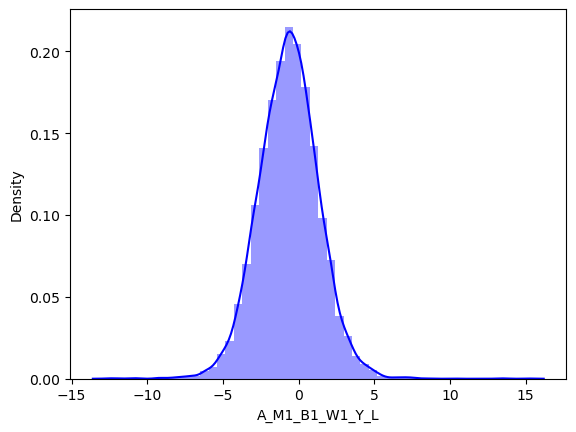

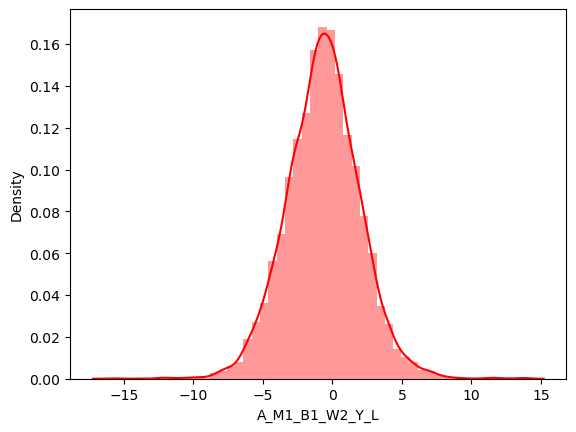

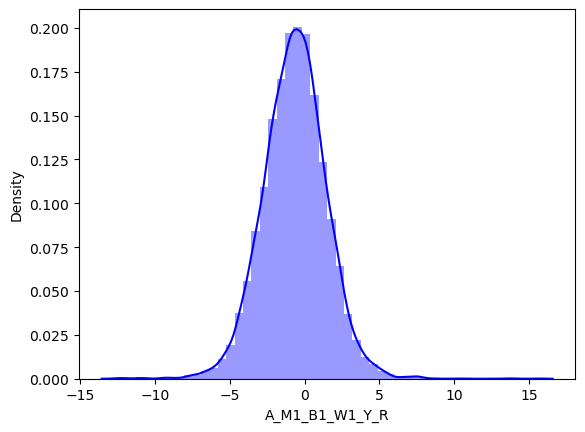

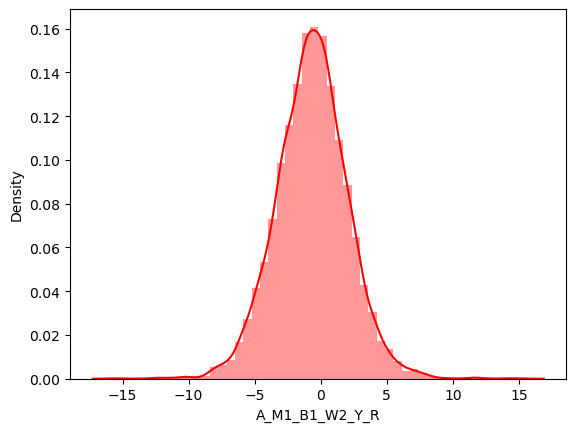

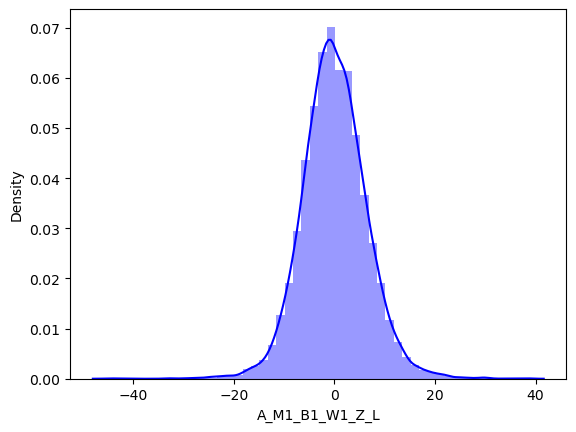

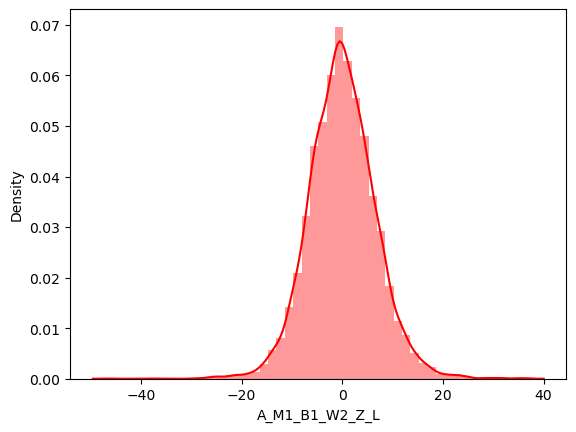

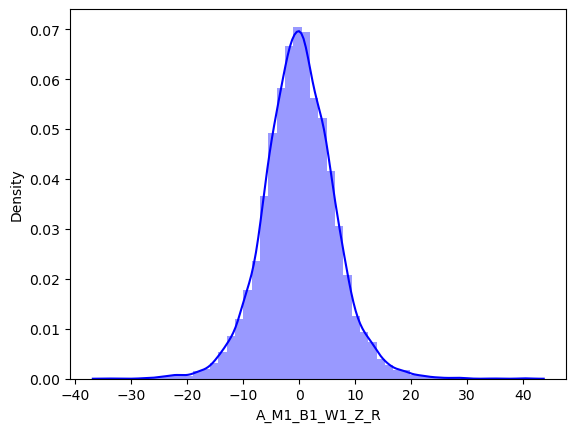

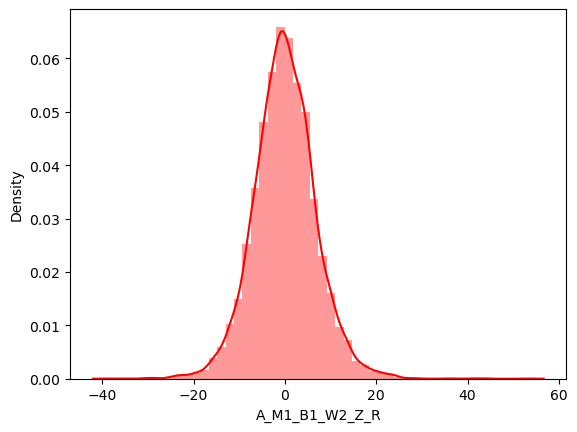

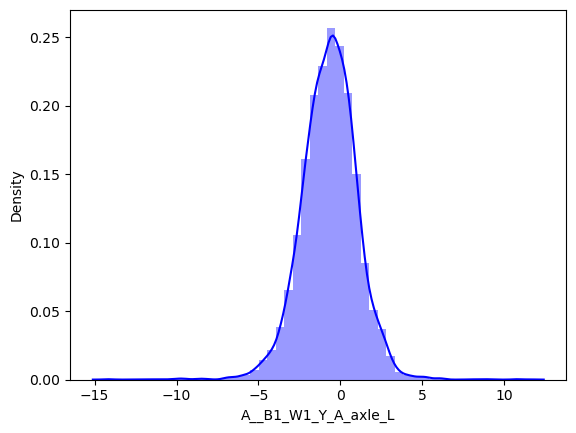

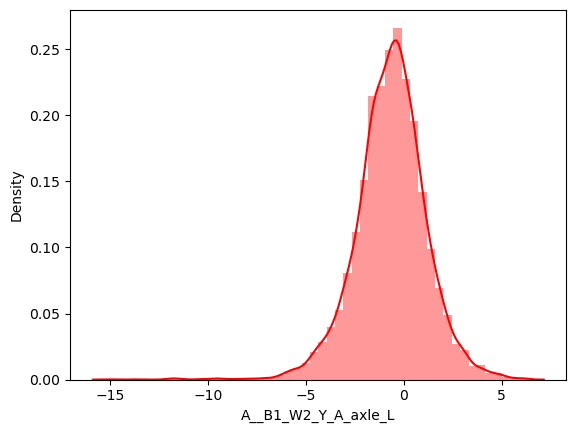

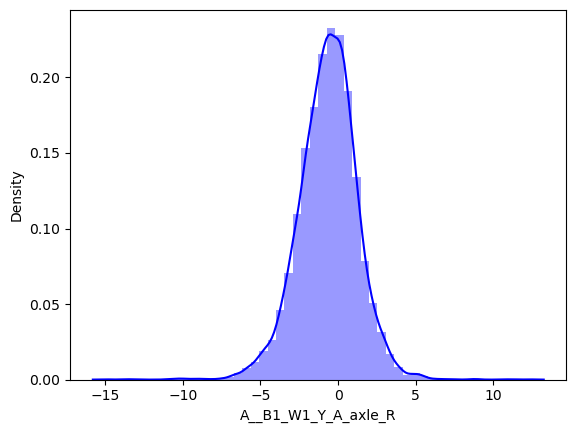

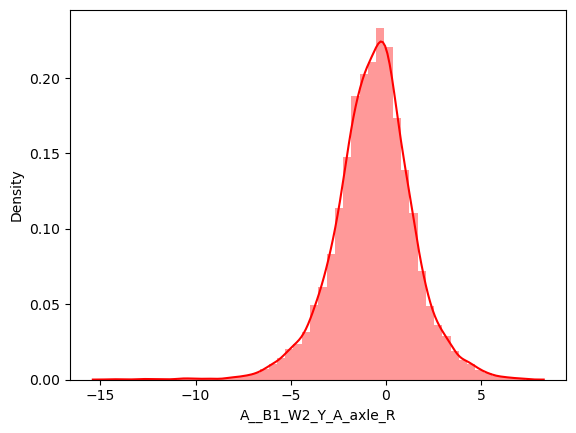

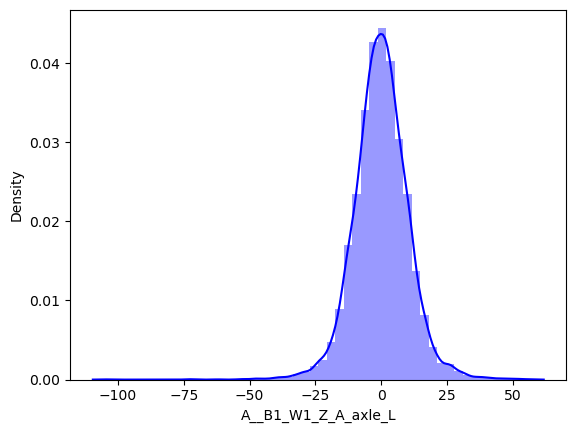

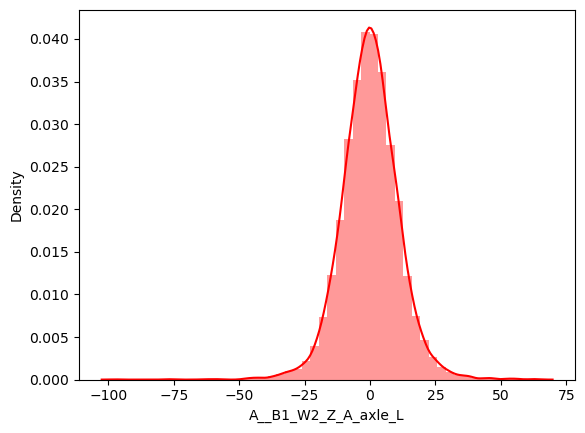

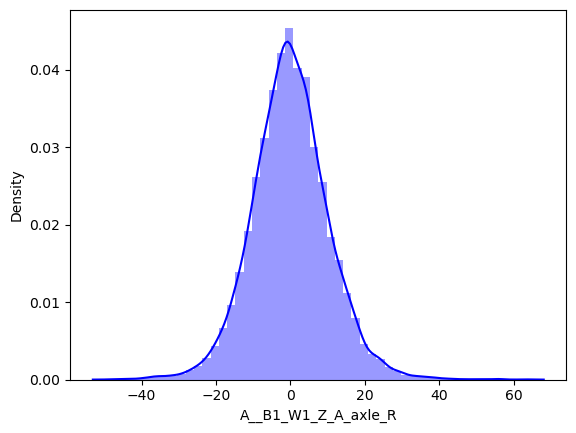

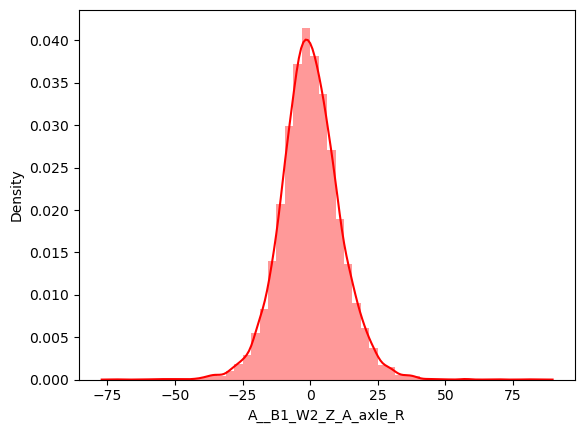

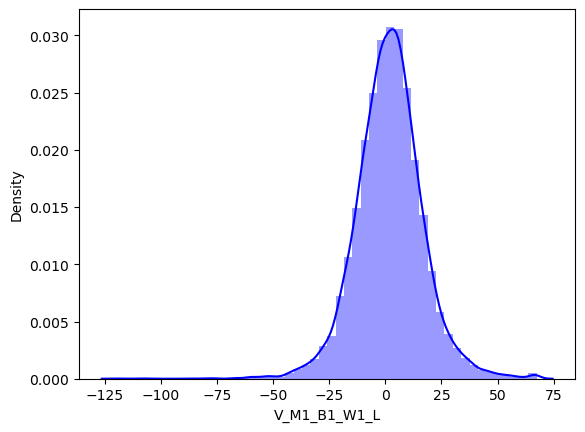

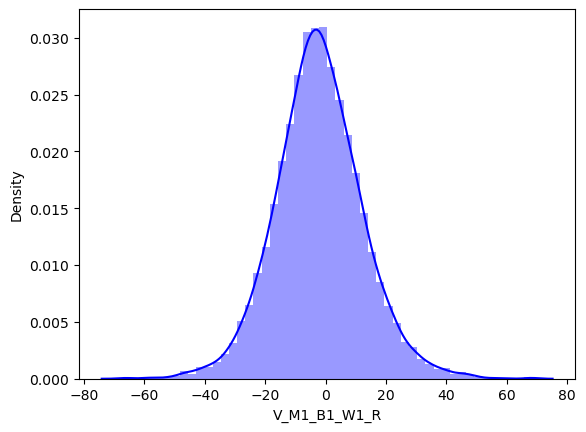

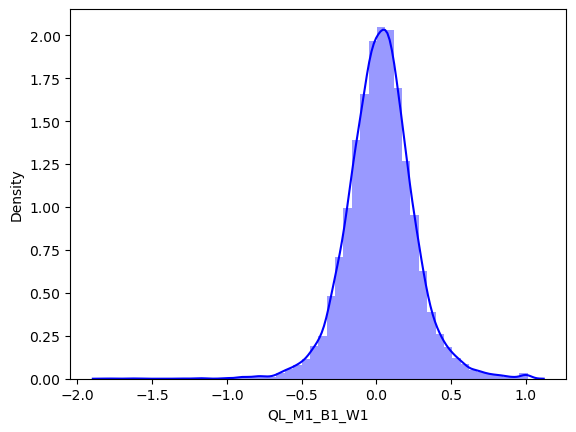

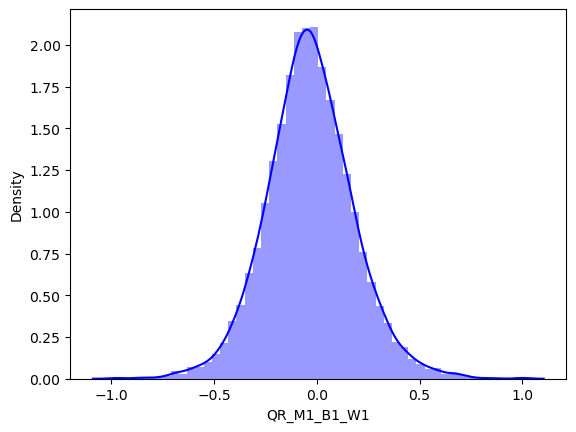

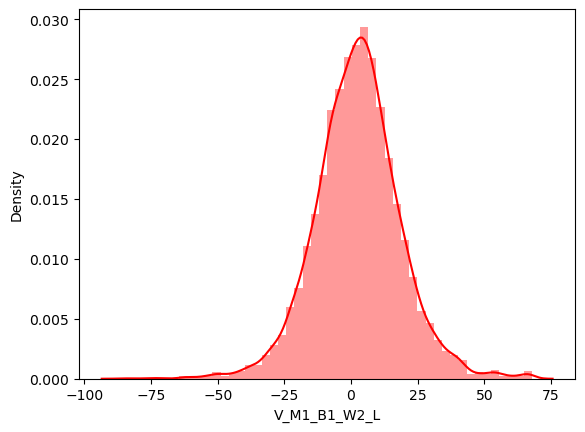

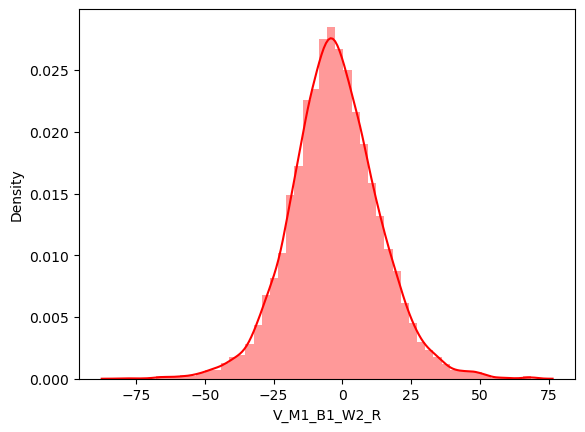

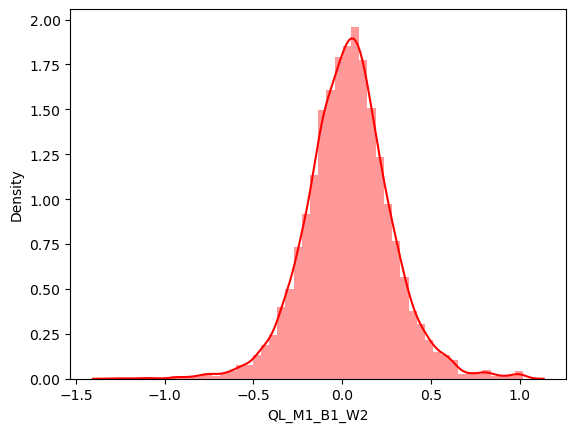

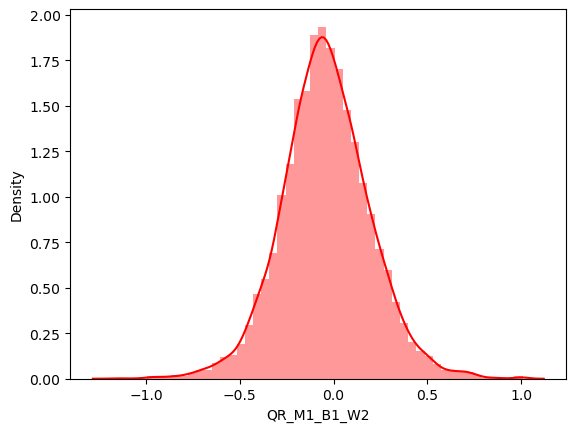

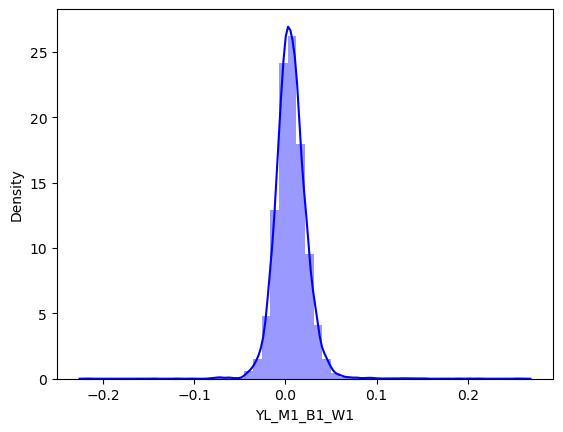

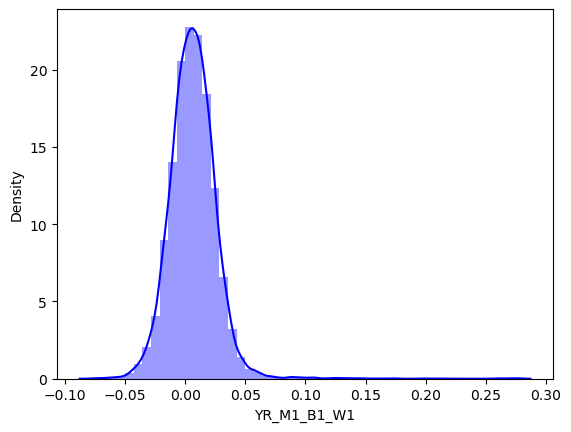

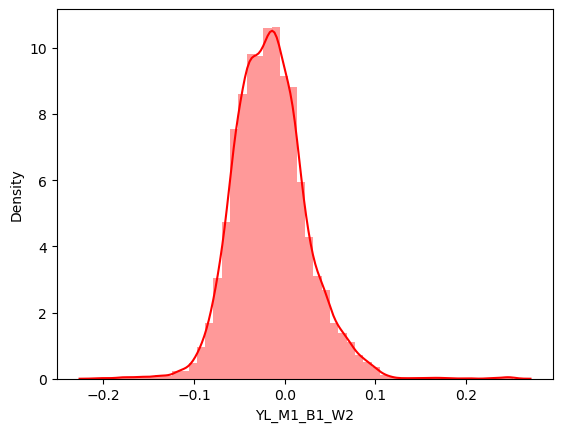

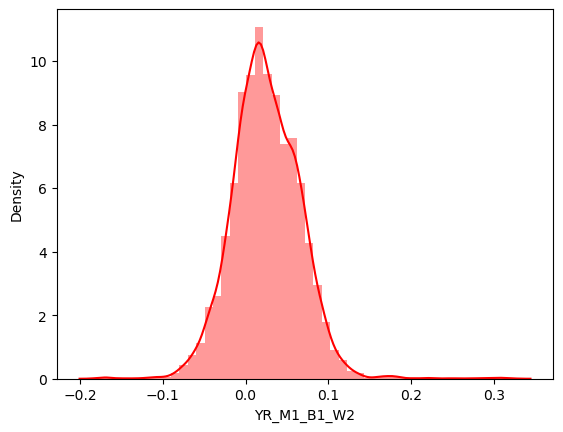

In [35]:
data = data_c[1]
for i in data.columns:
    if 'W1' in i:
        sns.distplot(data.loc[:10000,i],color='blue')
        # sns.distplot(data.loc[10000:,i])
    if 'W2' in i:
        sns.distplot(data.loc[:10000,i],color='red')
    plt.show()

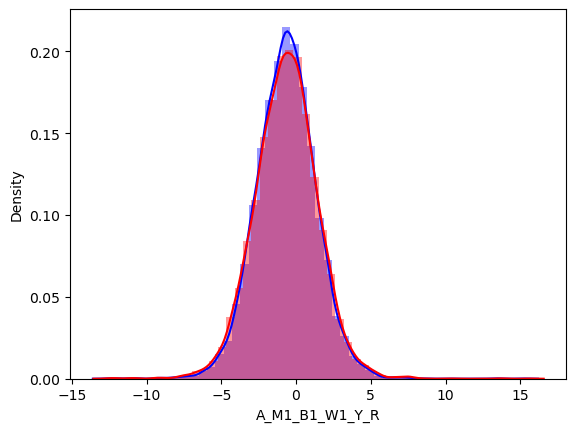

<AxesSubplot: xlabel='A_M1_B1_W2_Y_R', ylabel='Density'>

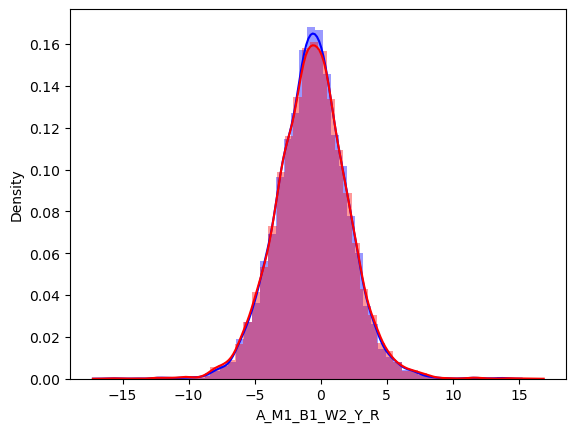

In [203]:
sns.distplot(data.loc[:10000,'A_M1_B1_W1_Y_L'],color='blue')
sns.distplot(data.loc[:10000,'A_M1_B1_W1_Y_R'],color='red')
plt.show()
sns.distplot(data.loc[:10000,'A_M1_B1_W2_Y_L'],color='blue')
sns.distplot(data.loc[:10000,'A_M1_B1_W2_Y_R'],color='red')

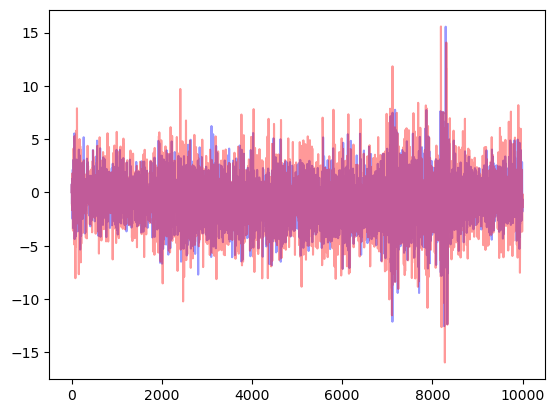

In [46]:
plt.plot(data.loc[:10000,'A_M1_B1_W1_Y_R'],color='blue',alpha=0.4)
plt.plot(data.loc[:10000,'A_M1_B1_W2_Y_R'],color='red',alpha=0.4)

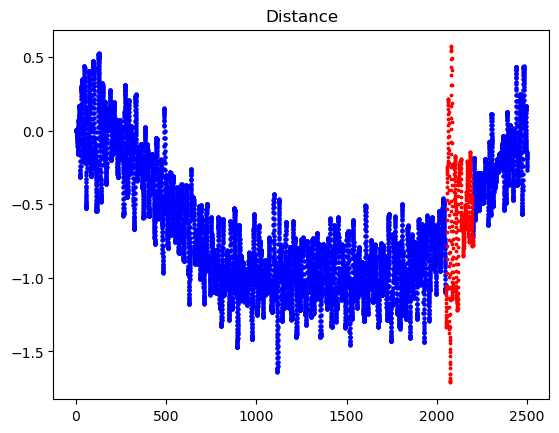

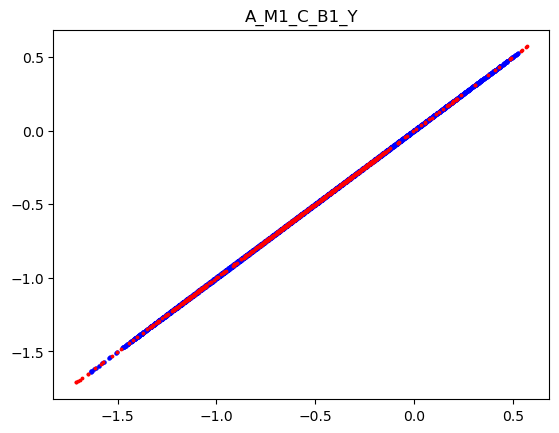

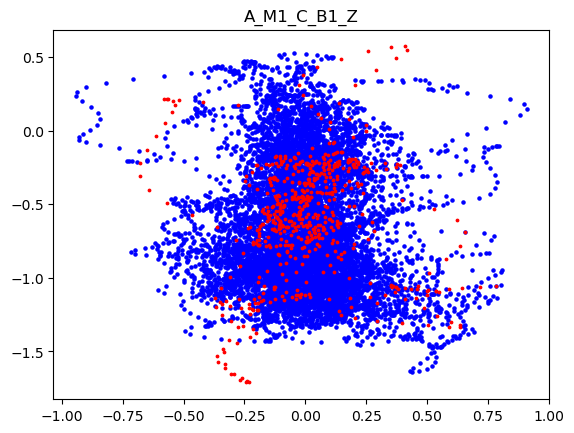

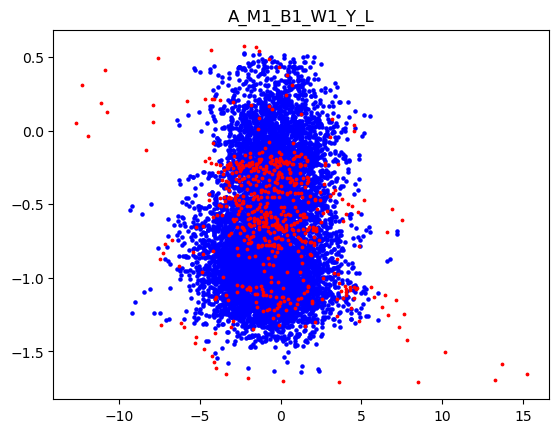

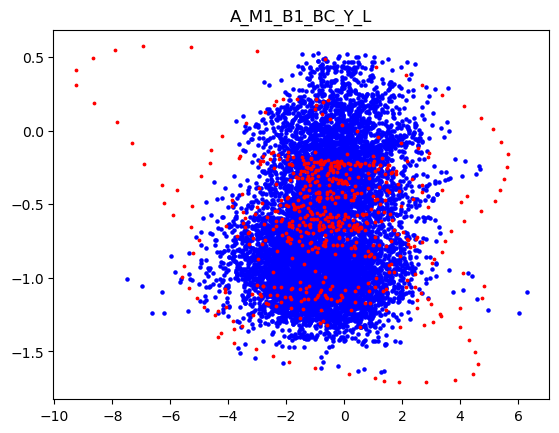

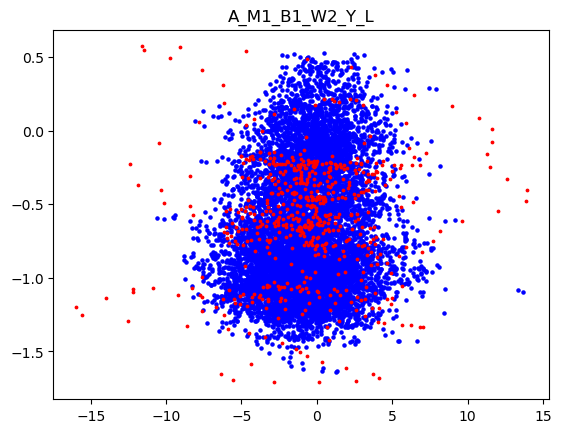

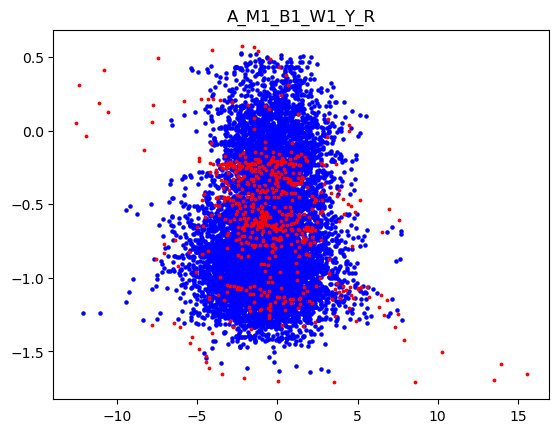

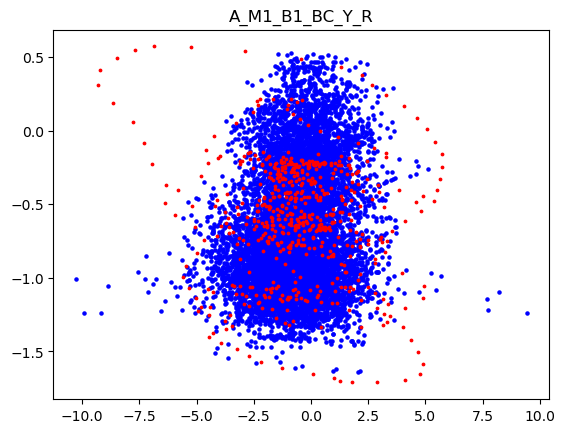

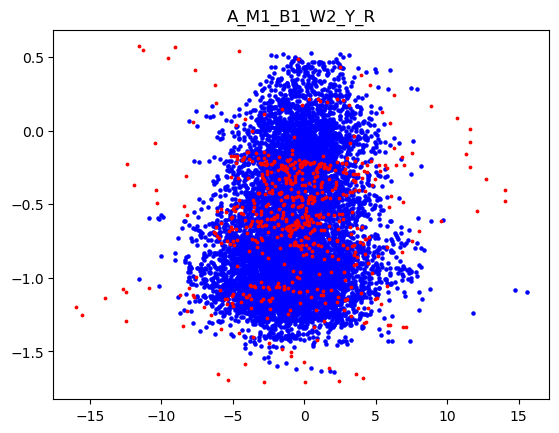

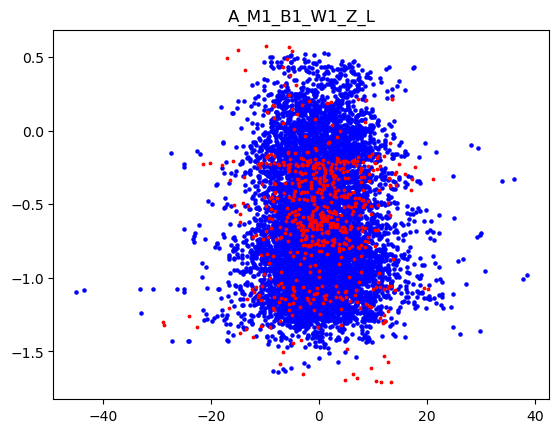

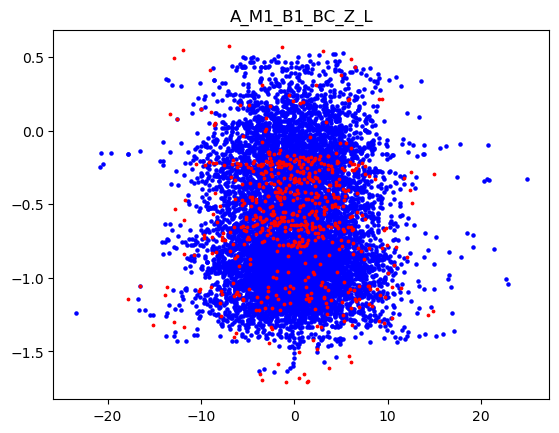

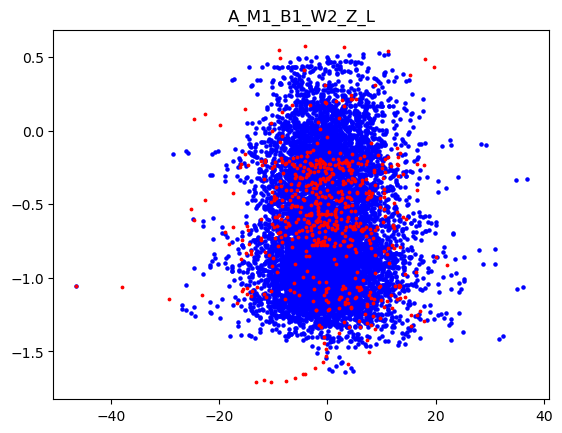

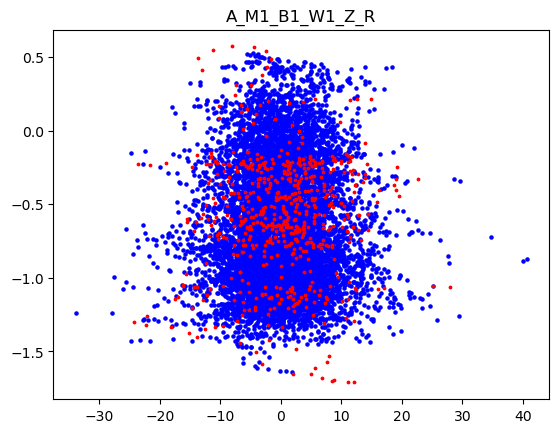

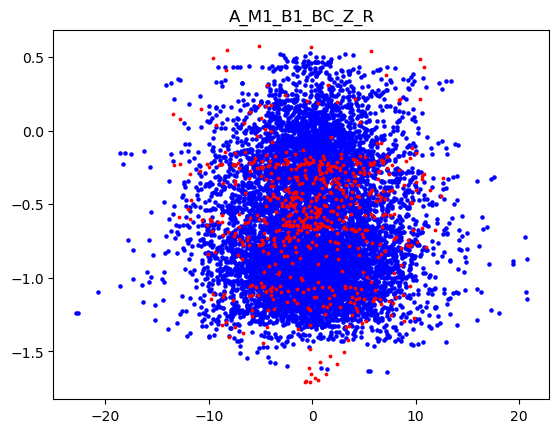

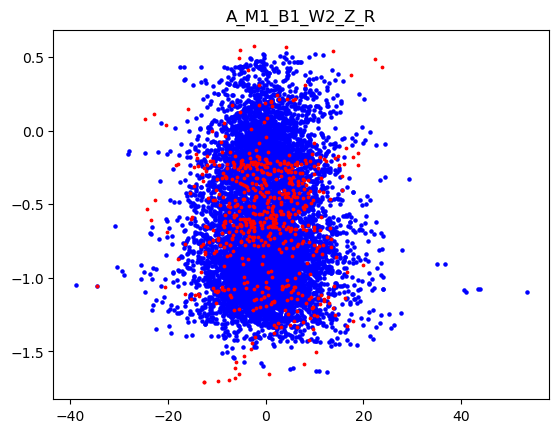

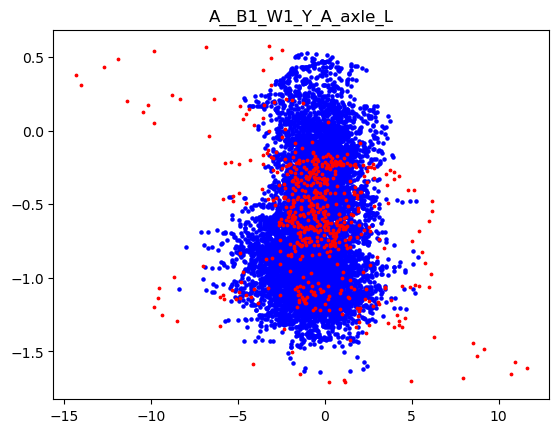

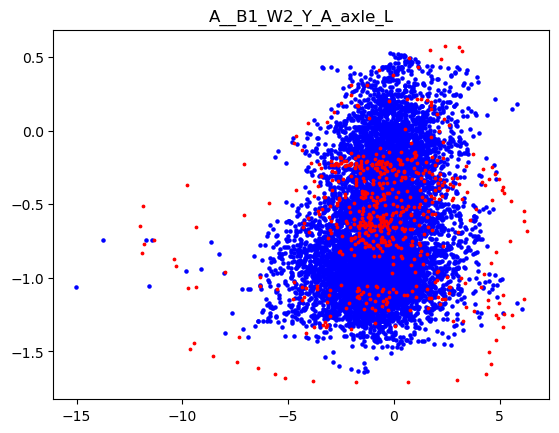

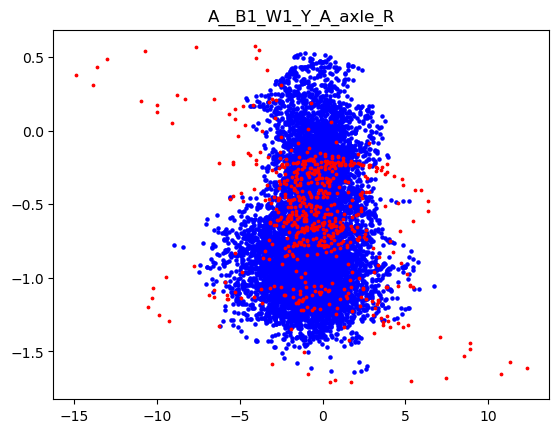

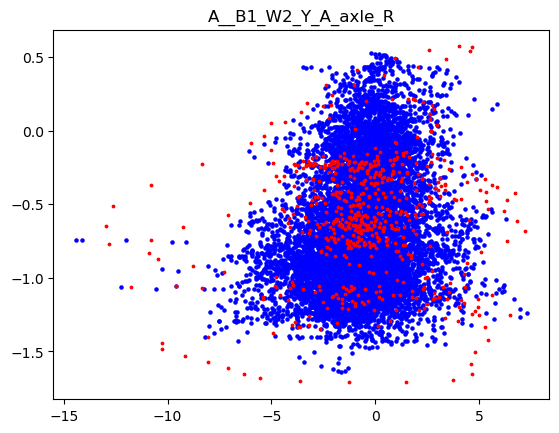

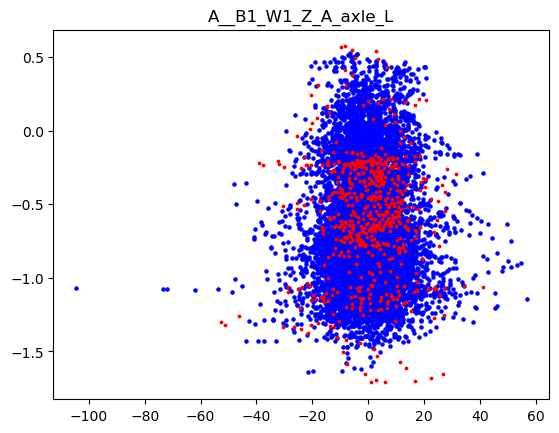

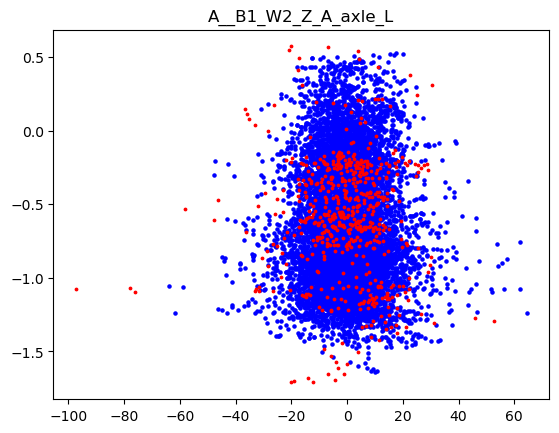

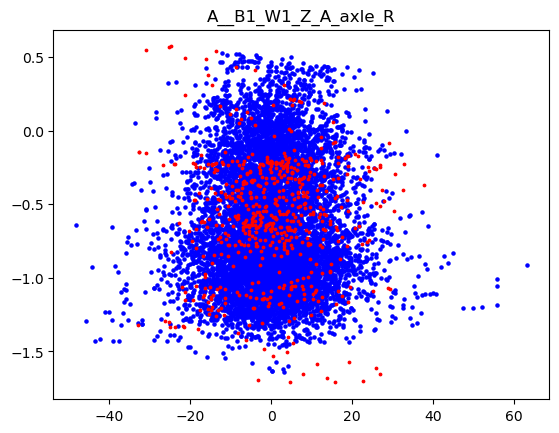

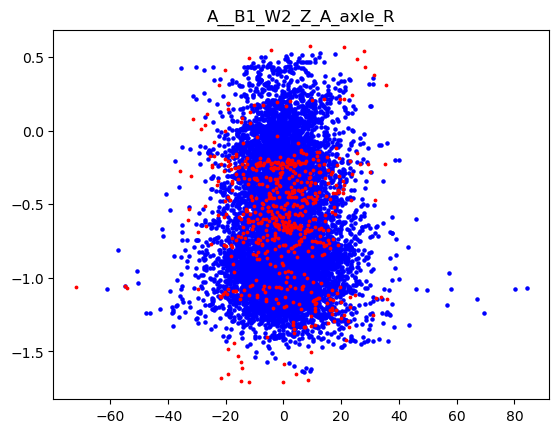

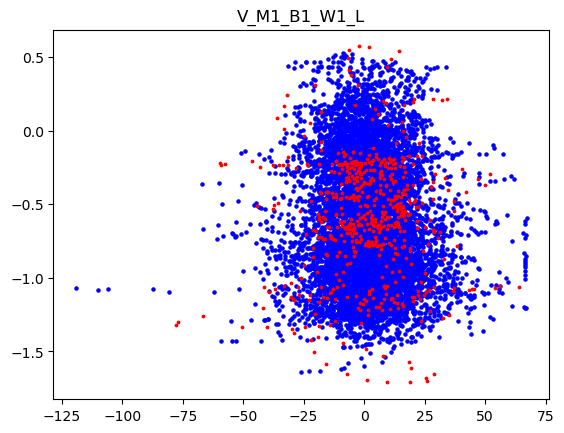

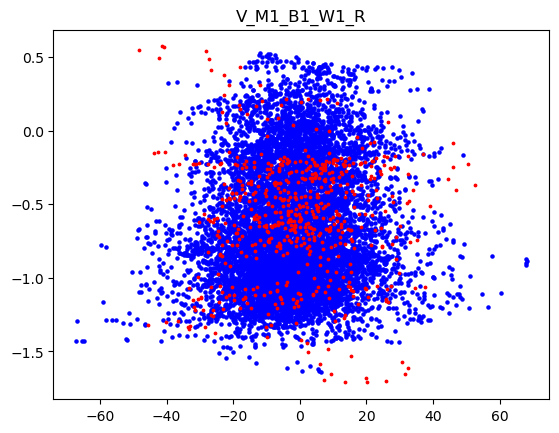

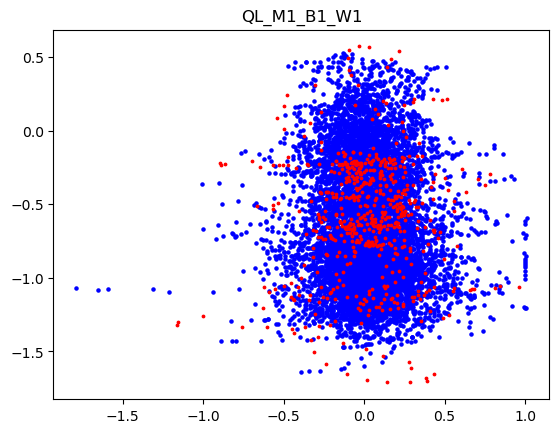

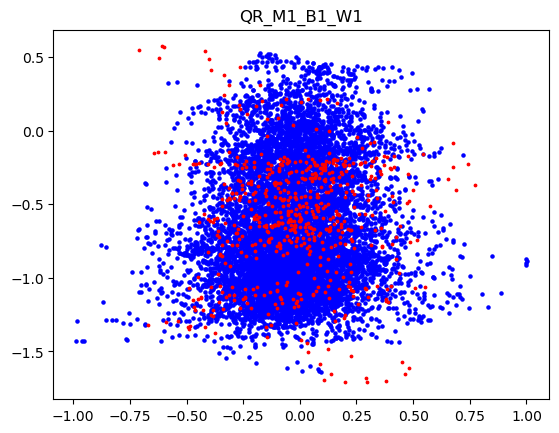

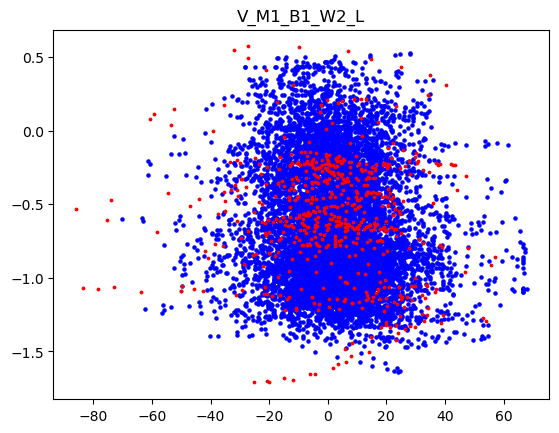

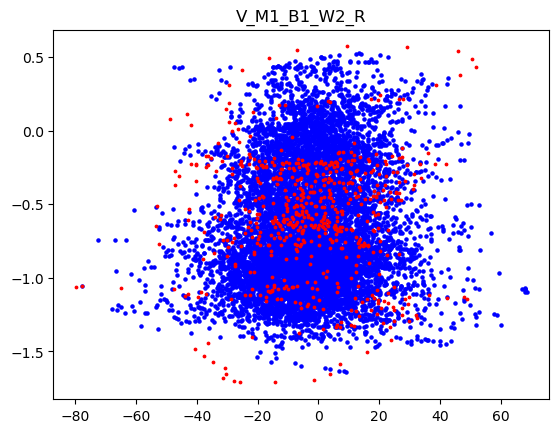

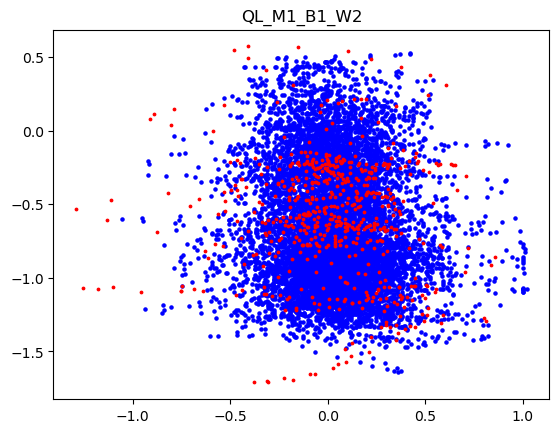

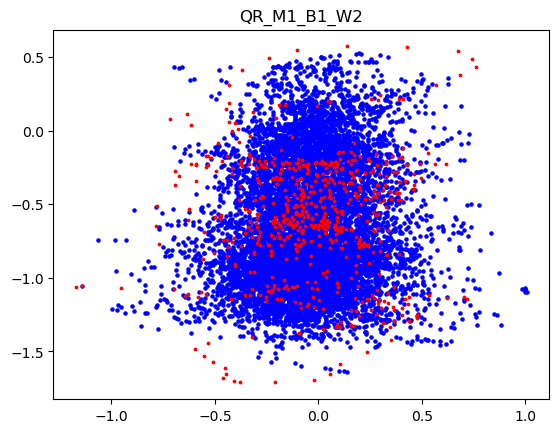

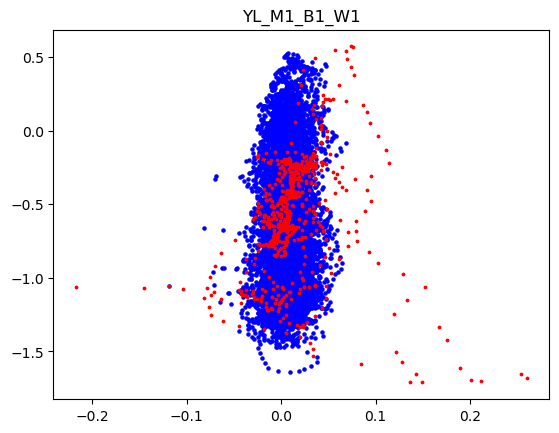

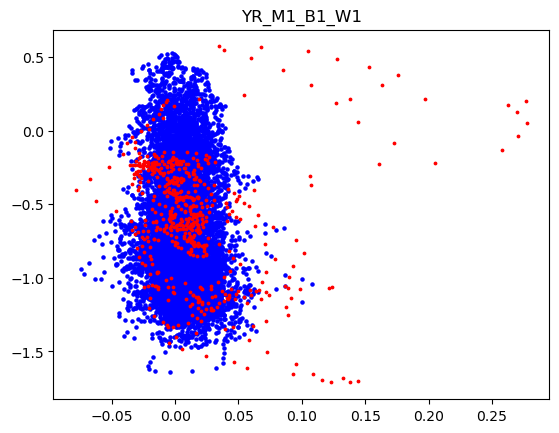

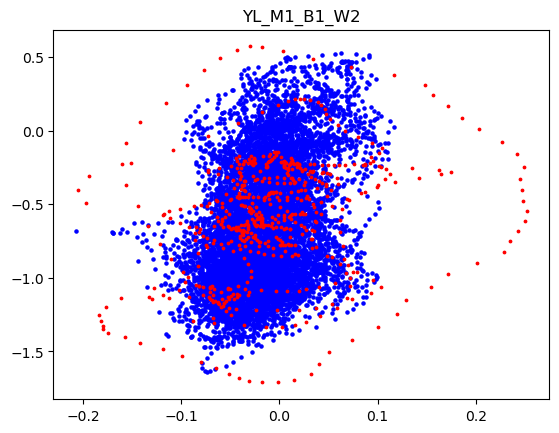

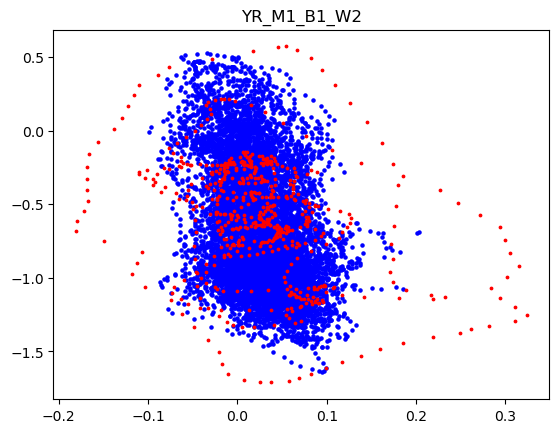

In [87]:
idx = 1
for i in data_c[idx].columns:
    plt.title(i)
    plt.scatter(data_c[idx].loc[:8200,i],data_c[idx].loc[:8200,'A_M1_C_B1_Y'],s=5,c='blue')
    plt.scatter(data_c[idx].loc[8800:10000,i],data_c[idx].loc[8800:10000,'A_M1_C_B1_Y'],s=5,c='blue')
    plt.scatter(data_c[idx].loc[8200:8800,i],data_c[idx].loc[8200:8800,'A_M1_C_B1_Y'],s=3,c='red')
    plt.show()

In [48]:
data_c[0].columns

Index(['Distance', 'A_M1_C_B1_Y', 'A_M1_C_B1_Z', 'A_M1_B1_W1_Y_L',
       'A_M1_B1_BC_Y_L', 'A_M1_B1_W2_Y_L', 'A_M1_B1_W1_Y_R', 'A_M1_B1_BC_Y_R',
       'A_M1_B1_W2_Y_R', 'A_M1_B1_W1_Z_L', 'A_M1_B1_BC_Z_L', 'A_M1_B1_W2_Z_L',
       'A_M1_B1_W1_Z_R', 'A_M1_B1_BC_Z_R', 'A_M1_B1_W2_Z_R',
       'A__B1_W1_Y_A_axle_L', 'A__B1_W2_Y_A_axle_L', 'A__B1_W1_Y_A_axle_R',
       'A__B1_W2_Y_A_axle_R', 'A__B1_W1_Z_A_axle_L', 'A__B1_W2_Z_A_axle_L',
       'A__B1_W1_Z_A_axle_R', 'A__B1_W2_Z_A_axle_R', 'V_M1_B1_W1_L',
       'V_M1_B1_W1_R', 'QL_M1_B1_W1', 'QR_M1_B1_W1', 'V_M1_B1_W2_L',
       'V_M1_B1_W2_R', 'QL_M1_B1_W2', 'QR_M1_B1_W2', 'YL_M1_B1_W1',
       'YR_M1_B1_W1', 'YL_M1_B1_W2', 'YR_M1_B1_W2'],
      dtype='object')

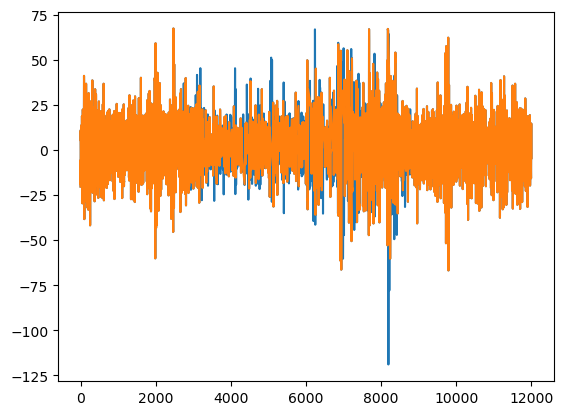

In [72]:
plt.plot(data_c[0]['V_M1_B1_W1_L'])
plt.plot(data_c[0][data_c[0]['A_M1_C_B1_Y'] > -1]['V_M1_B1_W1_L'])


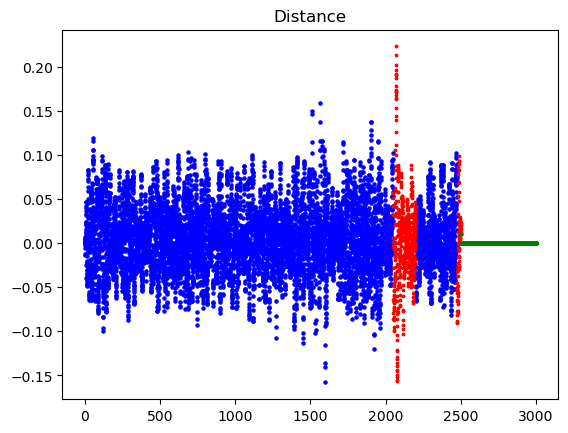

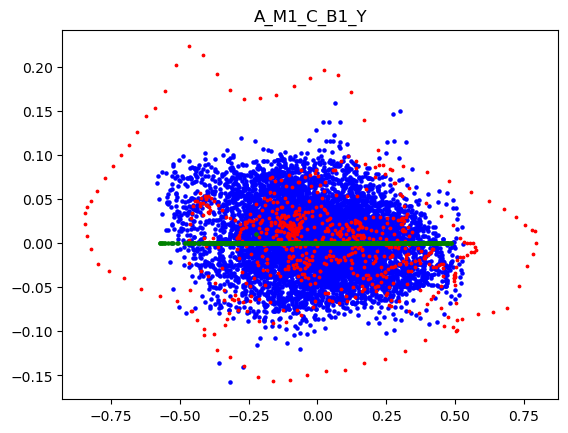

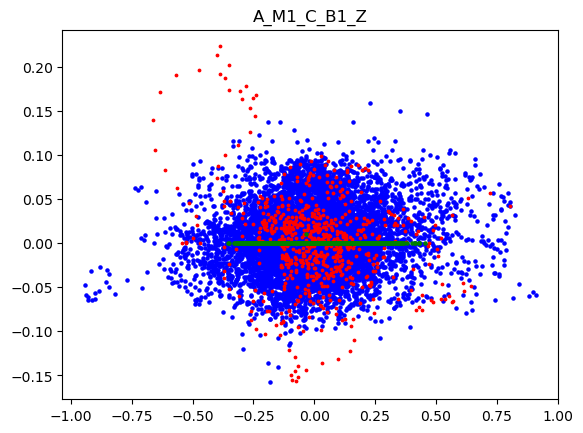

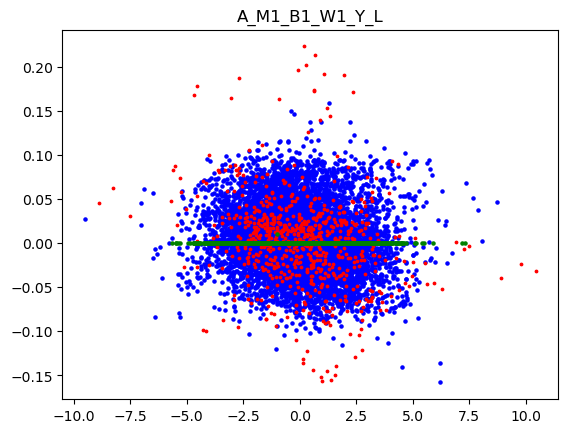

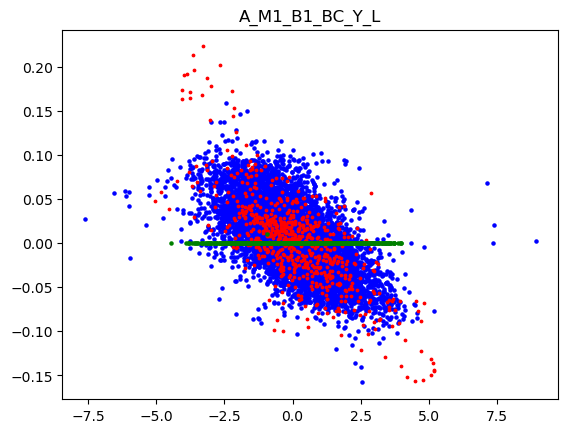

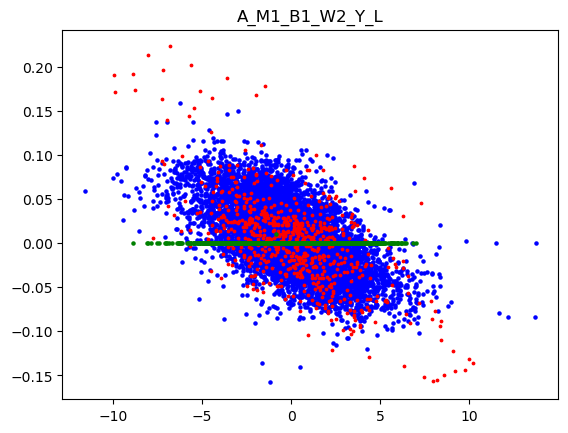

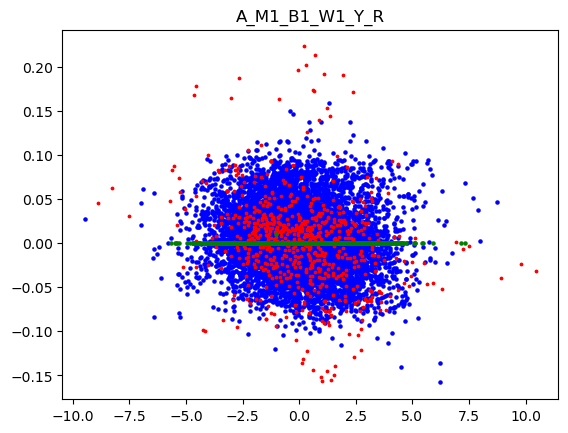

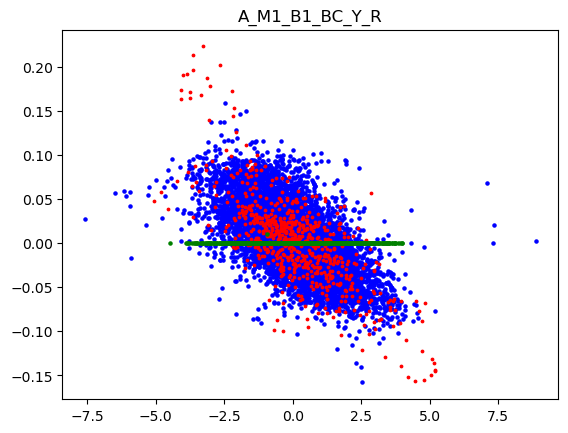

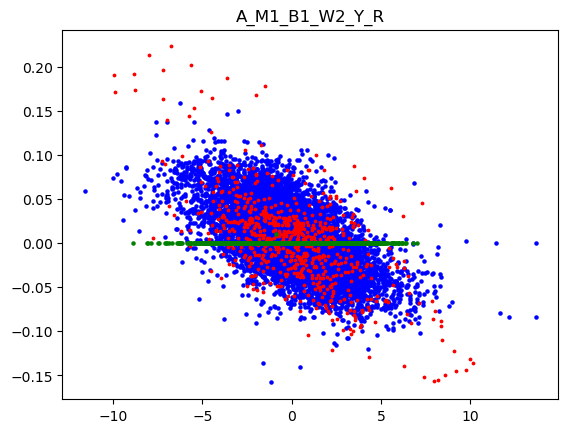

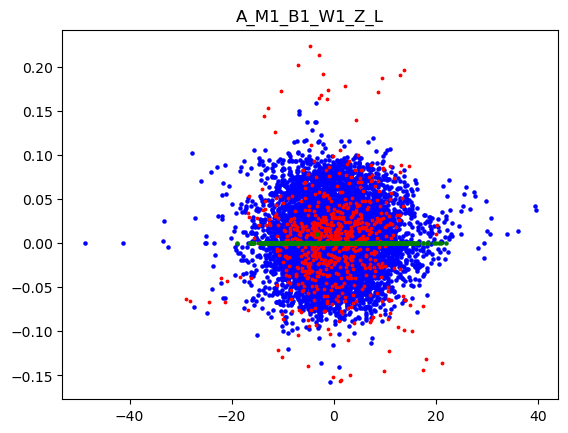

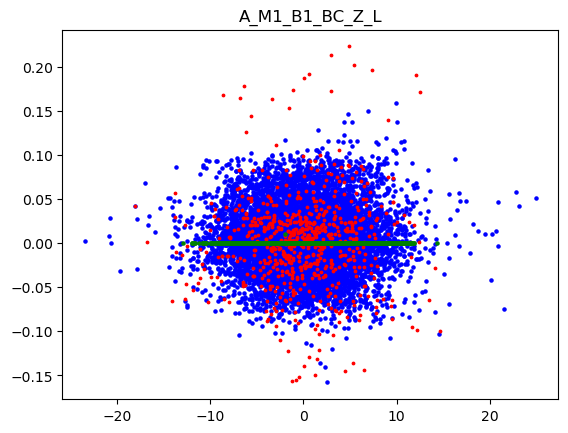

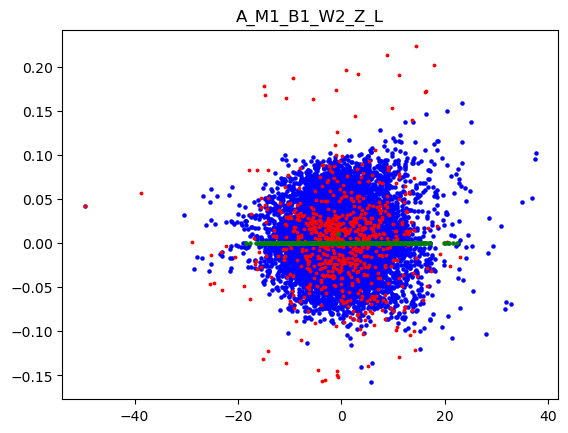

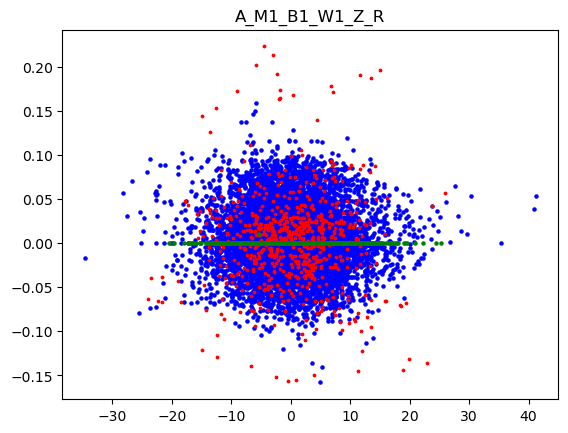

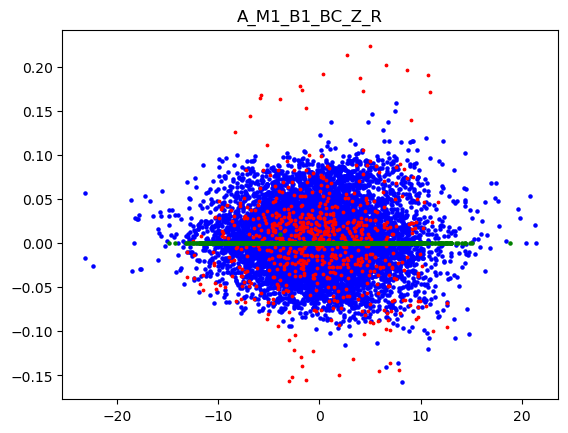

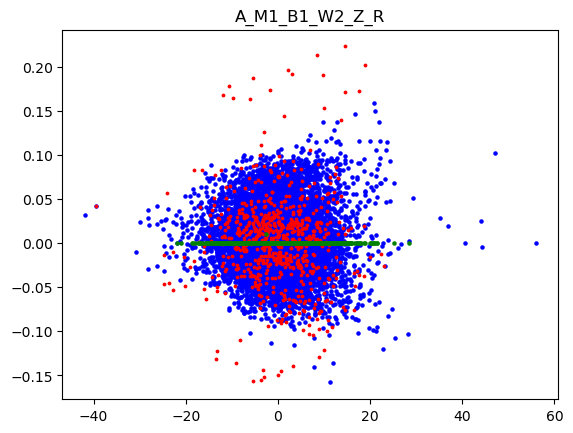

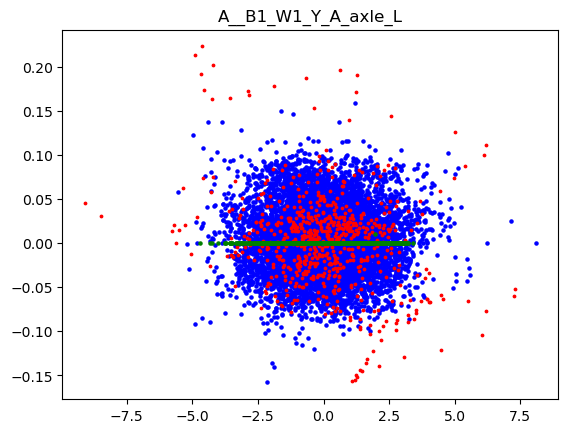

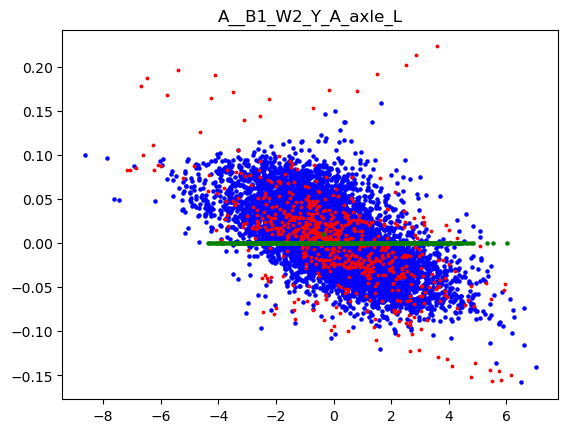

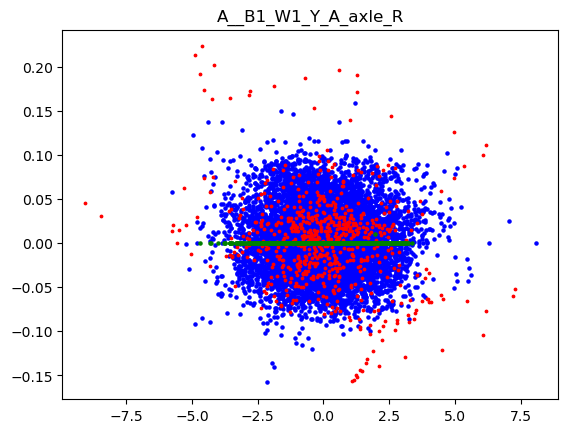

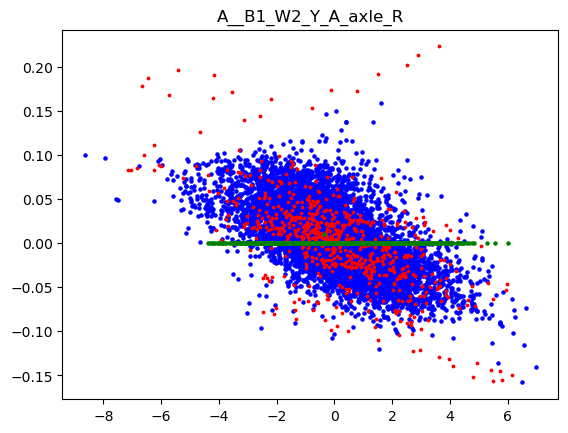

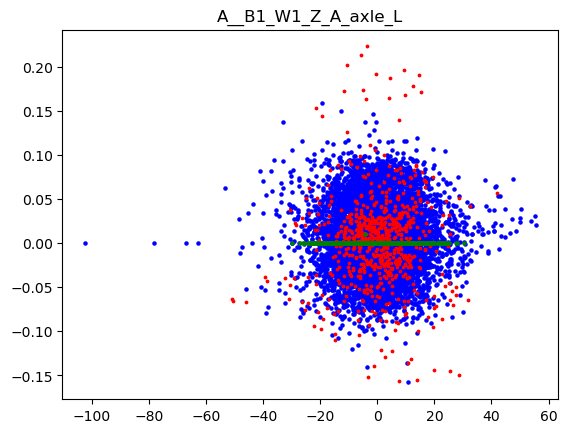

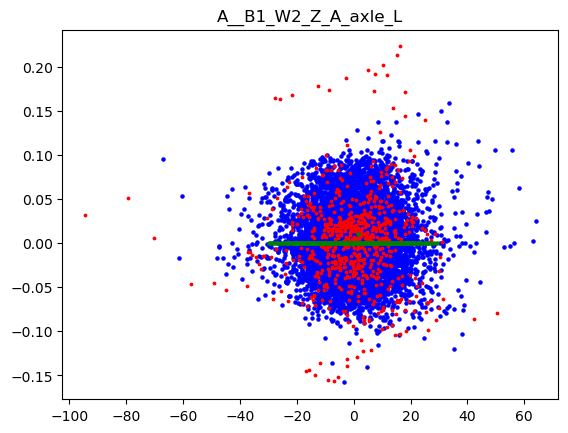

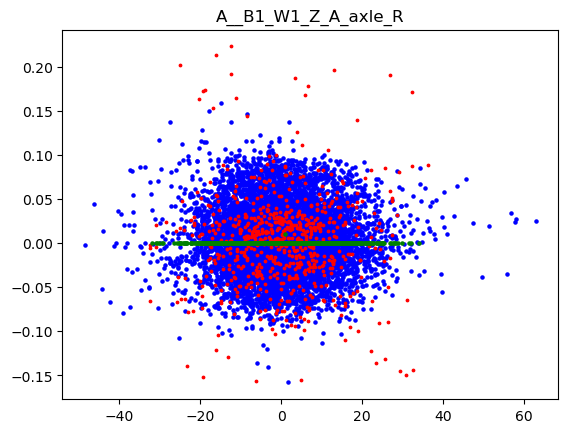

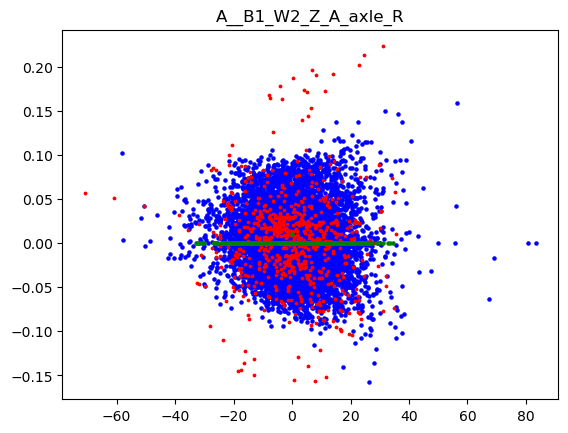

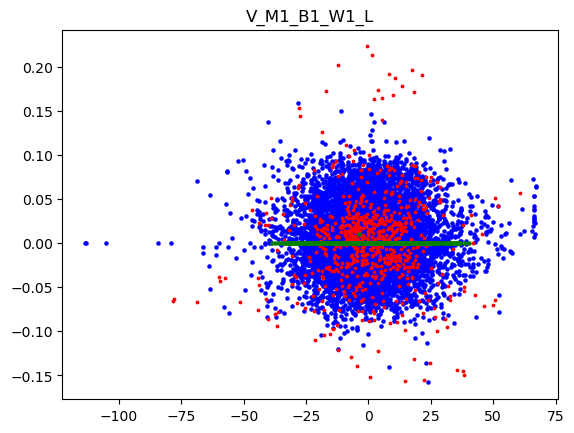

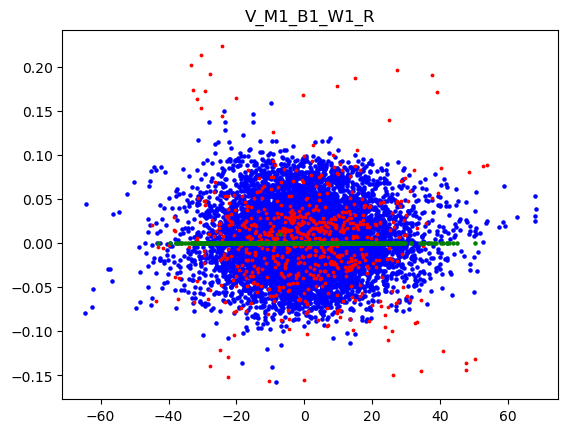

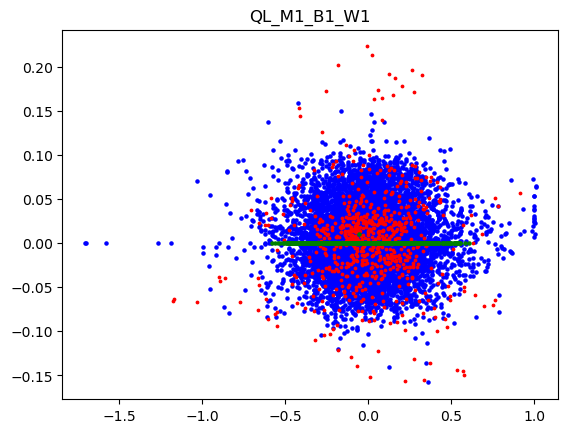

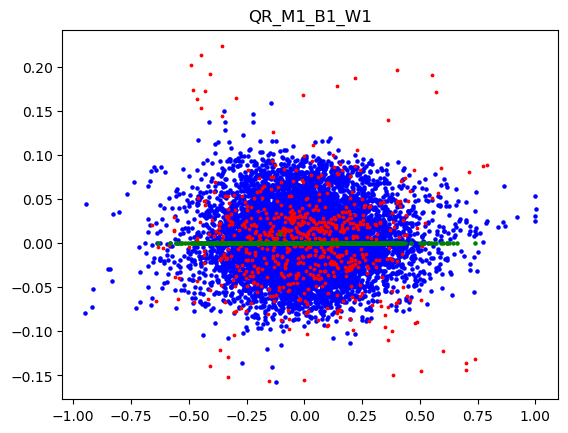

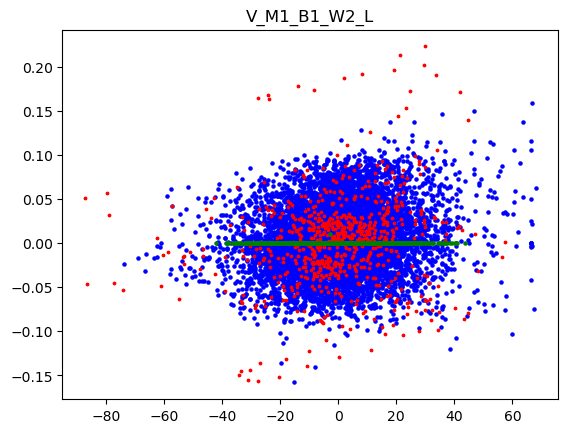

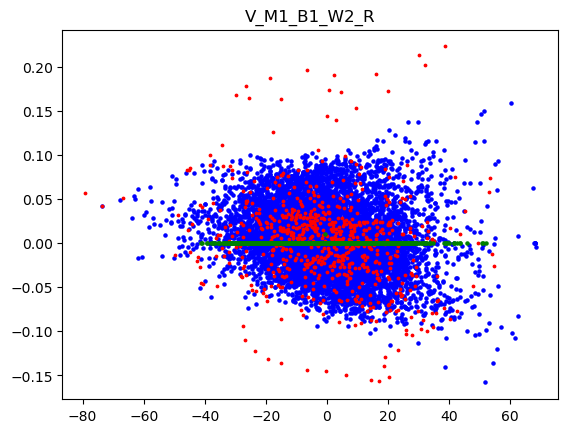

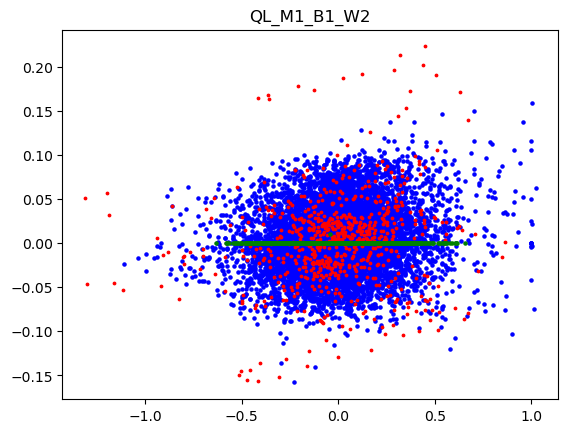

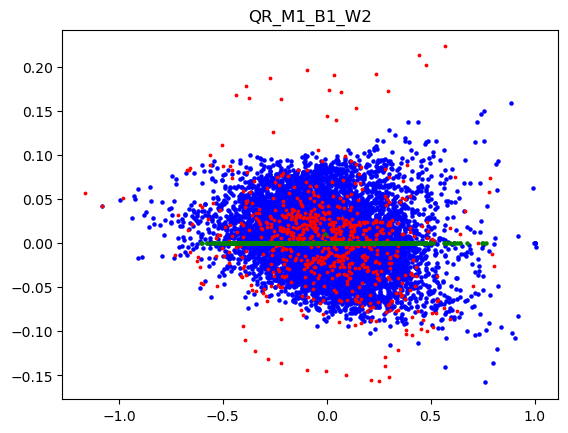

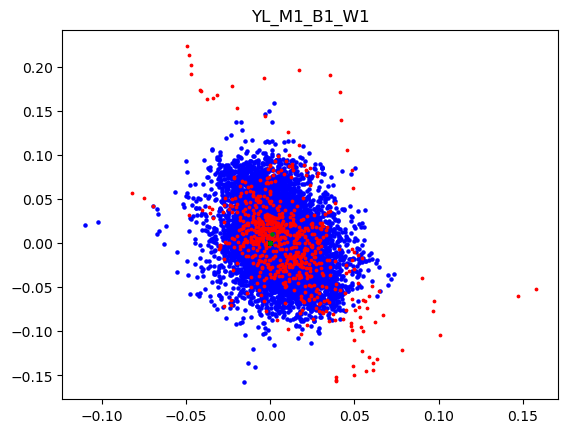

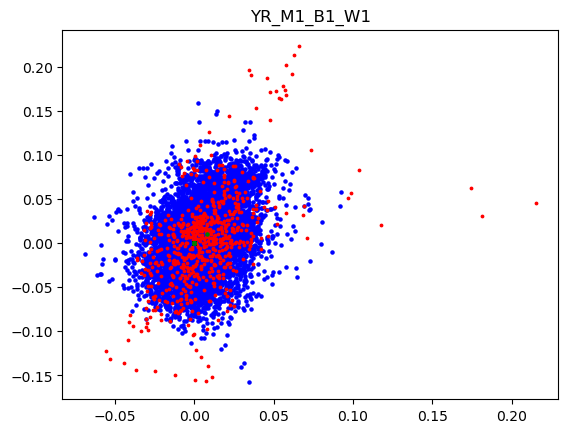

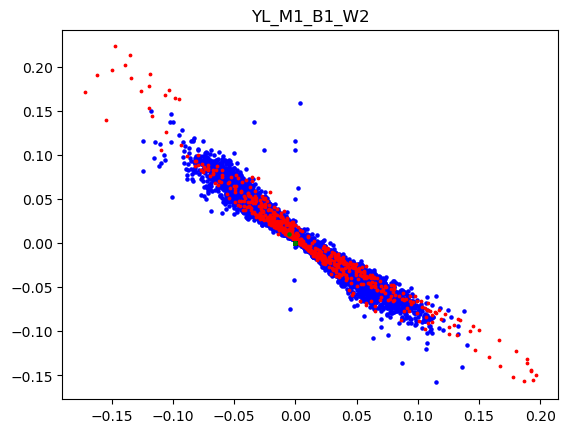

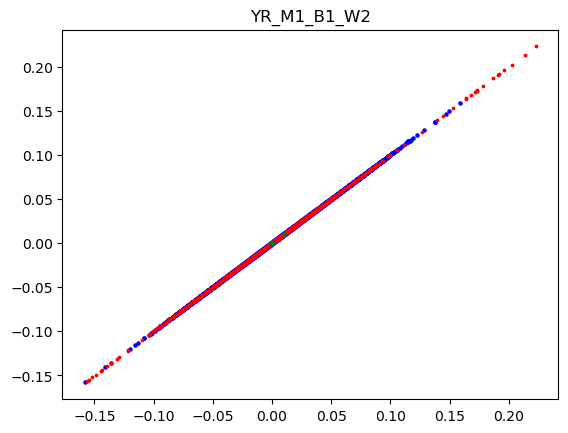

In [211]:
idx = 1
target = 'YR_M1_B1_W2' # 'V_M1_B1_W1_R','V_M1_B1_W2_L','V_M1_B1_W2_R'
for i in data_s[0].columns:
    plt.title(i)
    plt.scatter(data_s[idx].loc[:8200,i],data_s[idx].loc[:8200,target],s=5,c='blue')
    plt.scatter(data_s[idx].loc[8800:9900,i],data_s[idx].loc[8800:9900,target],s=5,c='blue')
    plt.scatter(data_s[idx].loc[8200:8800,i],data_s[idx].loc[8200:8800,target],s=3,c='red')
    plt.scatter(data_s[idx].loc[9900:10000,i],data_s[idx].loc[9900:10000,target],s=3,c='red')

    plt.scatter(data_s[idx].loc[10000:,i],data_s[idx].loc[10000:,target],s=5,c='green')
    plt.show()

In [ ]:
idx = 0
target = 'A_M1_C_B1_Y' # 'V_M1_B1_W1_R','V_M1_B1_W2_L','V_M1_B1_W2_R'
for i in data_s[0].columns:
    plt.title(i)
    plt.scatter(data_s[idx].loc[:8200,i],data_s[idx].loc[:8200,target],s=5,c='blue')
    plt.scatter(data_s[idx].loc[8800:9900,i],data_s[idx].loc[8800:9900,target],s=5,c='blue')
    plt.scatter(data_s[idx].loc[8200:8800,i],data_s[idx].loc[8200:8800,target],s=3,c='red')
    plt.scatter(data_s[idx].loc[9900:10000,i],data_s[idx].loc[9900:10000,target],s=3,c='red')

    plt.scatter(data_s[idx].loc[10000:,i],data_s[idx].loc[10000:,target],s=5,c='green')
    plt.show()

In [172]:
target = pd.read_csv('./answer.csv').drop('Unnamed: 0',axis=1)
target.columns
target

Distance  YL_M1_B1_W1_s30  YR_M1_B1_W1_s30  YL_M1_B1_W2_s30  \
0      2500.25         0.030617        -0.008465         0.032549   
1      2500.50         0.034142        -0.006614         0.027595   
2      2500.75         0.026823        -0.004008         0.035459   
3      2501.00         0.022203         0.000091         0.051013   
4      2501.25         0.016741        -0.001274         0.061032   
...        ...              ...              ...              ...   
1994   2998.75         0.000856         0.006527         0.028715   
1995   2999.00         0.000669         0.007130         0.017492   
1996   2999.25         0.008348         0.004181         0.022360   
1997   2999.50         0.008414        -0.009481         0.007701   
1998   2999.75         0.015936        -0.012558        -0.000167   

      YR_M1_B1_W2_s30  YL_M1_B1_W1_s40  YR_M1_B1_W1_s40  YL_M1_B1_W2_s40  \
0           -0.019298         0.006811         0.006249        -0.020184   
1           -0.019695         0.005331         0.005509        -0.021816   
2           -0.024360        -0.005789         0.009173        -0.018176   
3           -0.026481        -0.013580         0.022157         0.001944   
4           -0.036755        -0.014050         0.026395         0.009232   
...               ...              ...              ...              ...   
1994        -0.019007         0.006666        -0.000571         0.023096   
1995        -0.011059         0.007902         0.002180         0.019372   
1996         0.008730         0.010249        -0.002746         0.016458   
1997         0.002287         0.012699        -0.004078         0.003789   
1998         0.010146         0.015407        -0.007287         0.000846   

      YR_M1_B1_W2_s40  YL_M1_B1_W1_s50  ...  YL_M1_B1_W2_c50  YR_M1_B1_W2_c50  \
0            0.027411         0.017143  ...        -0.013384         0.023381   
1            0.024902         0.010602  ...        -0.013057         0.018612   
2            0.028596        -0.004614  ...         0.005179         0.004037   
3            0.005526        -0.011883  ...         0.016287        -0.009556   
4           -0.004581        -0.015850  ...         0.030162        -0.018809   
...               ...              ...  ...              ...              ...   
1994        -0.013544         0.004328  ...         0.015667        -0.006268   
1995        -0.010691         0.009004  ...         0.022804        -0.013003   
1996        -0.005568         0.011418  ...         0.015971        -0.006722   
1997         0.001243         0.013053  ...         0.008801         0.000929   
1998         0.005905         0.017235  ...        -0.004528         0.013837   

      YL_M1_B1_W1_c70  YR_M1_B1_W1_c70  YL_M1_B1_W2_c70  YR_M1_B1_W2_c70  \
0            0.018862        -0.003869        -0.016257         0.025214   
1            0.017340        -0.003136        -0.009312         0.012780   
2            0.014212        -0.009382         0.003076         0.004969   
3            0.010322        -0.008780         0.015918        -0.008753   
4           -0.006374         0.007680         0.030293        -0.016993   
...               ...              ...              ...              ...   
1994         0.007215         0.000475         0.017611        -0.008958   
1995         0.007697         0.000729         0.021486        -0.011803   
1996         0.008498        -0.001499         0.011958        -0.008604   
1997         0.008581        -0.001110         0.010456         0.000038   
1998         0.023441        -0.008101        -0.003845         0.016117   

      YL_M1_B1_W1_c100  YR_M1_B1_W1_c100  YL_M1_B1_W2_c100  YR_M1_B1_W2_c100  
0             0.020062         -0.003128         -0.016142          0.022866  
1             0.016474         -0.006727         -0.009692          0.016141  
2             0.012990         -0.009114          0.004102          0.005216  
3             0.014941         -0.007896          0.016558    

In [173]:
# for i in target.columns:
# #     target[i] = target[i] + 0.5
#     if 'W2' in i:
#         target[i] = target[i]*(1/16)
#     else:
#         if '30' in i:
#             target[i] = target[i]*(1/4.8)
#         elif '40' in i:
#             target[i] = target[i]*(1/6.4)
#         elif '50' in i:
#             target[i] = target[i]*(1/8)
#         elif '70' in i:
#             target[i] = target[i]*(1/11.2)
#         elif '100' in i:
#             target[i] = target[i]*(1/16)

In [174]:
target.set_index('Distance').to_csv('./answer_scaled.csv')

In [175]:
sum([i for i in np.linspace(1.0001,1.1999,1999)])*(100/1999) # pred : 0 case

110.00000000000004

In [183]:
train = pd.read_csv('./data/data_s30.csv').loc[:10000,'YL_M1_B1_W1']
target = pd.read_csv('./answer.csv').drop('Unnamed: 0',axis=1)

w = [i for i in np.linspace(1.0001,1.1999,1999)]
ans = []
for tar in target.columns[1:]:
    tp1 = target['YL_M1_B1_W1_s30']
    ans.append(sum([w[i]*abs(0.01-tp2[i]*0.05)/abs(0.01) for i in range(len(w))])*(100/1999))
    
sum(ans)/40

106.96858797460393

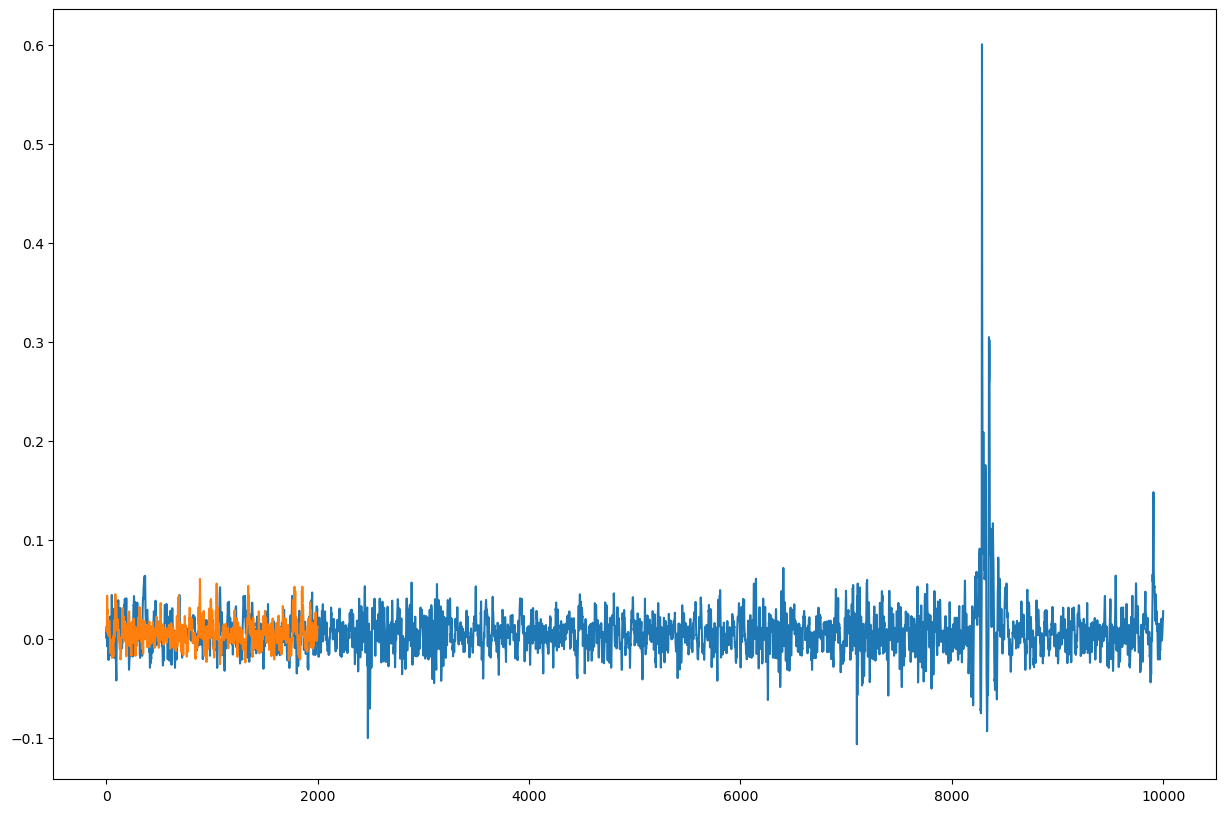

In [179]:
plt.figure(figsize=(15,10))
plt.plot(train)
plt.plot(tp2)

In [196]:
x = 0.01
y = x + 0.5
abs(x-y)/x

50.0

In [197]:
abs(x-y)/x*80000

4000000.0

In [198]:
(20*5+20*110)/40

57.5

In [ ]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
X = data_c[0].iloc[:,:31]
y = data_c[0].loc[:,'YL_M1_B1_W1']
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selector.support_
selector.ranking_